In [1]:
##Import all the necessary packages
import rpy2.rinterface
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as sm
import statsmodels.formula.api as smf
from scipy.stats import t as tdist
from statsmodels.stats.outliers_influence import summary_table
import seaborn as sns

In [2]:
%load_ext rpy2.ipython

In [3]:
os.getcwd()
os.chdir("/Users/apple/Desktop/Math 372/lab1")
bike_share = pd.read_csv('bike_share.csv')

In [4]:
%%R
getwd()
setwd("/Users/apple/Desktop/Math 372/lab1")
data <- read.csv(file="bike_share.csv", header = T)

In [5]:
season = bike_share["season"]
weather = bike_share["weather"]
temp = bike_share["temp"]
humidity = bike_share["humidity"]
windspeed = bike_share["windspeed"]
count = bike_share["count"]

In [6]:
%%R
season <- data$season
weather <- data$weather
temp <- data$temp
humidity <- data$humidity
windspeed <- data$windspeed
count <- data$count

get the data from different cols

part A

<module 'matplotlib.pyplot' from '/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>


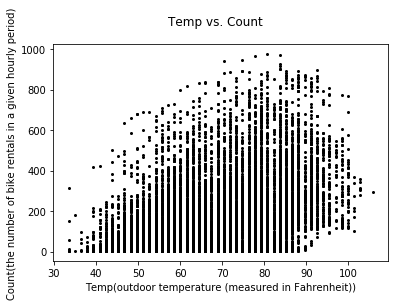

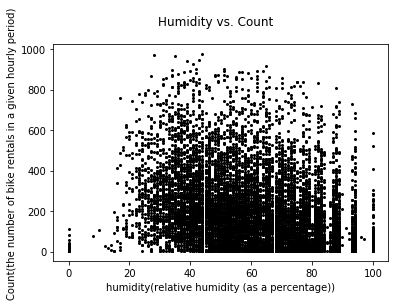

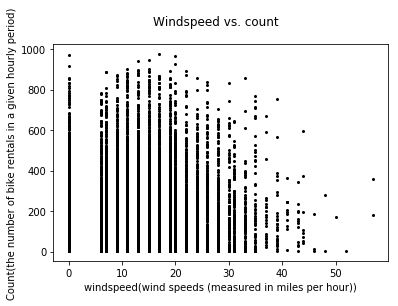

In [11]:
list_of_variables=[temp, humidity, windspeed]
list_of_xlabel=["Temp(outdoor temperature (measured in Fahrenheit))", 
                "humidity(relative humidity (as a percentage))",
                "windspeed(wind speeds (measured in miles per hour))"]
list_of_main=["Temp vs. Count", "Humidity vs. Count", "Windspeed vs. count" ]
for i in range (len(list_of_variables)):   
    fig = plt.figure()
    plt.scatter(list_of_variables[i], count, c="black",s=4)
    fig.suptitle(list_of_main[i])
    plt.xlabel(list_of_xlabel[i])
    plt.ylabel("Count(the number of bike rentals in a given hourly period)")
    print(plt)

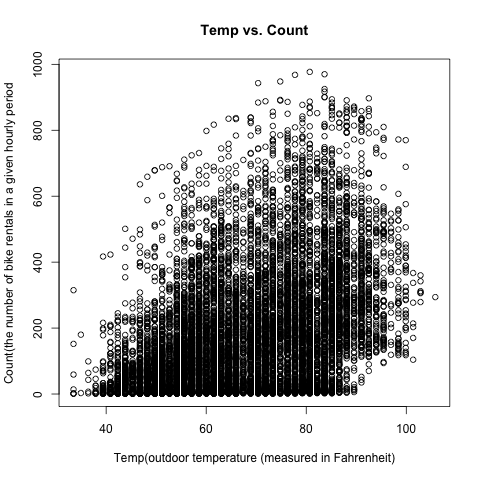

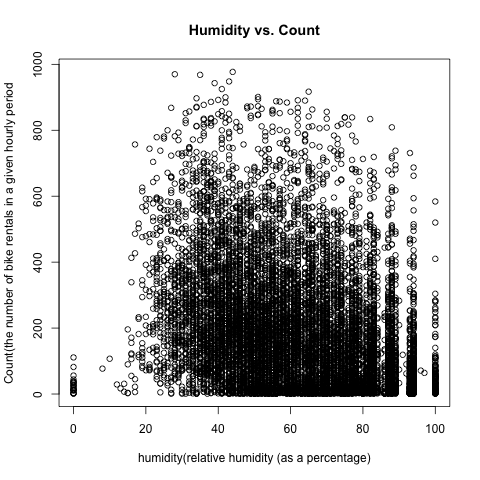

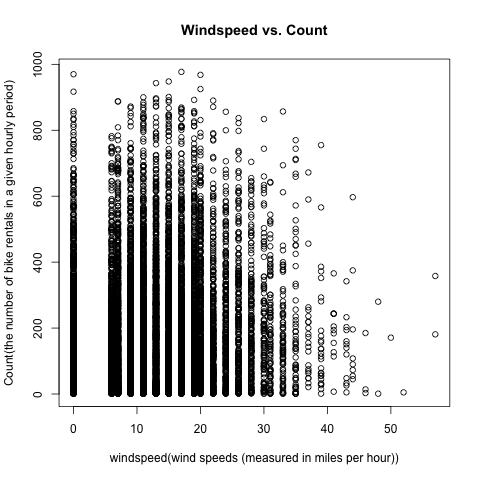

In [13]:
%%R
plot(temp, count, ylab = "Count(the number of bike rentals in a given hourly period", 
     xlab="Temp(outdoor temperature (measured in Fahrenheit)", main = "Temp vs. Count")
plot(humidity, count, ylab = "Count(the number of bike rentals in a given hourly period", 
     xlab="humidity(relative humidity (as a percentage)", main = "Humidity vs. Count")
plot(windspeed, count, ylab="Count(the number of bike rentals in a given hourly period)", 
     xlab= "windspeed(wind speeds (measured in miles per hour))", main="Windspeed vs. Count")

    construct a scatterplot of temp and count:
    base on the plot, my obeservation for the linear relationship of temp and count is
    direction: positive, strength: weak

    construct a scatterplot of humidity and count:
    base on the plot, my obeservation for the linear relationship of humidity and count is
    direction: negative, strength: weak
    
    construct a scatterplot of windspeed and count:
    base on the plot, my obeservation for the linear relationship of windspeed and count is
    direction: negative, strength: weak



In [21]:
print("The correlation coeffcient of temperature and count is: ",np.corrcoef(temp,count)[0,1])
print("The correlation coeffcient of humidity and count is:    ",np.corrcoef(humidity,count)[0,1])
print("The correlation coeffcient of windspeed and count is:    ",np.corrcoef(windspeed,count)[0,1])

The correlation coeffcient of temperature and count is:  0.39445364496724894
The correlation coeffcient of humidity and count is:     -0.31737147887659445
The correlation coeffcient of humidity and count is:     0.10136947021033274


In [26]:
%%R
print(paste("The correlation coeffcient of temperature and count is: ",cor(temp, count)))
print(paste("The correlation coeffcient of humidity and count is:    ",cor(humidity, count)))
print(paste("The correlation coeffcient of windspeed and count is:   ",cor(windspeed, count)))

[1] "The correlation coeffcient of temperature and count is:  0.394453644967249"
[1] "The correlation coeffcient of humidity and count is:     -0.317371478876595"
[1] "The correlation coeffcient of windspeed and count is:    0.101369470210333"


Part B

In [47]:
beta1_hat = np.corrcoef(temp, count)[0,1] * np.std(count)/np.std(temp)
print("beta1_hat for temperature is : ", beta1_hat)
beta0_hat = np.mean(count) - beta1_hat * np.mean(temp)
print("beta0_hat for temperature is : ", beta0_hat)
print("The line of the best fit is:    y = 5.095x-156.99")
print()
beta1_hat = np.corrcoef(humidity, count)[0,1] * np.std(count)/np.std(humidity)
print("beta1_hat for humidity is : ", beta1_hat)
beta0_hat = np.mean(count) - beta1_hat * np.mean(humidity)
print("beta0_hat for humidity is : ", beta0_hat)
print("The line of the best fit is: y = -2.99x+376.45")
print()
beta1_hat = np.corrcoef(windspeed, count)[0,1] * np.std(count)/np.std(windspeed)
print("beta1_hat for windspeed is : ", beta1_hat)
beta0_hat = np.mean(count) - beta1_hat * np.mean(windspeed)
print("beta0_hat for windspeed is : ", beta0_hat)
print("The line of the best fit is:  y = 2.25x+162.79")

beta1_hat for temperature is :  5.0947447119035685
beta0_hat for temperature is :  -156.98561782130764
The line of the best fit is:    y = 5.095x-156.99

beta1_hat for humidity is :  -2.987268578534409
beta0_hat for humidity is :  376.44560833036167
The line of the best fit is: y = -2.99x+376.45

beta1_hat for windspeed is :  2.249057917336571
beta0_hat for windspeed is :  162.78755033543703
The line of the best fit is:  y = 2.25x+162.79


In [51]:
%%R
beta1_hat <- cor(temp, count)*sd(count)/sd(temp)
print(paste("beta1_hat of temperature :", beta1_hat))
beta0_hat <- mean(count)-beta1_hat*mean(temp)
print(paste("beat0_hat of temperature : ", beta0_hat))
print(paste("The line of the best fit is:    y = 5.095x-156.99"))
beta1_hat <- cor(humidity, count)*sd(count)/sd(humidity)
print(paste("beta1_hat of humidity :", beta1_hat))
beta0_hat <- mean(count)-beta1_hat*mean(humidity)
print(paste("beat0_hat of humidity: ", beta0_hat))
print(paste("The line of the best fit is: y = -2.99x+376.45"))
beta1_hat <- cor(windspeed, count)*sd(count)/sd(windspeed)
print(paste("beta1_hat of windspeed:", beta1_hat))
beta0_hat <- mean(count)-beta1_hat*mean(windspeed)
print(paste("beat0_hat: of windspeed: ", beta0_hat))
print(paste("The line of the best fit is:  y = 2.25x+162.79"))

[1] "beta1_hat of temperature : 5.09474471190347"
[1] "beat0_hat of temperature :  -156.985617821294"
[1] "The line of the best fit is:    y = 5.095x-156.99"
[1] "beta1_hat of humidity : -2.98726857853443"
[1] "beat0_hat of humidity:  376.445608330363"
[1] "The line of the best fit is: y = -2.99x+376.45"
[1] "beta1_hat of windspeed: 2.24905791733652"
[1] "beat0_hat: of windspeed:  162.787550335439"
[1] "The line of the best fit is:  y = 2.25x+162.79"


Part C

<module 'matplotlib.pyplot' from '/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>


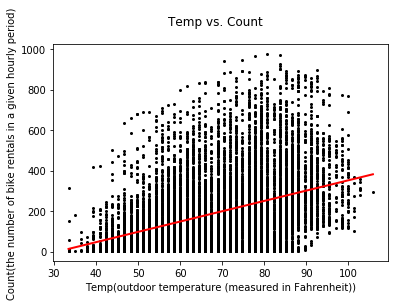

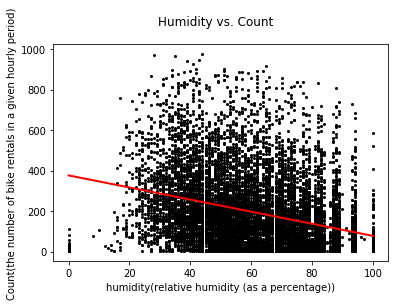

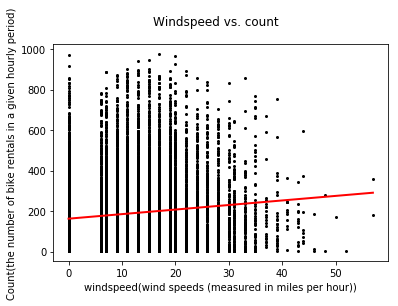

In [55]:
list_of_variables=[temp, humidity, windspeed]
list_of_xlabel=["Temp(outdoor temperature (measured in Fahrenheit))", 
                "humidity(relative humidity (as a percentage))",
                "windspeed(wind speeds (measured in miles per hour))"]
list_of_main=["Temp vs. Count", "Humidity vs. Count", "Windspeed vs. count" ]
for i in range (len(list_of_variables)):  
    lm = smf.OLS(count, sm.tools.tools.add_constant(list_of_variables[i]), ) # create linear regression object
    model = lm.fit() # this is the model
    model.summary()
    fig = plt.figure()
    plt.scatter(list_of_variables[i], count, c="black",s=4)
    fig.suptitle(list_of_main[i])
    plt.xlabel(list_of_xlabel[i])
    plt.ylabel("Count(the number of bike rentals in a given hourly period)")
    x_pred = np.linspace(list_of_variables[i].min(), list_of_variables[i].max(), 50)
    x_pred_int = sm.tools.tools.add_constant(x_pred)
    y_pred = model.predict(x_pred_int)
    fitted_line, = plt.plot(x_pred, y_pred, '-', color = "red", linewidth = 2, label = "Fitted Values")   
    print(plt)


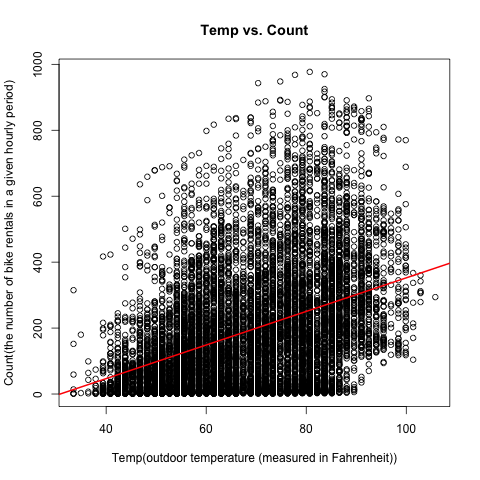

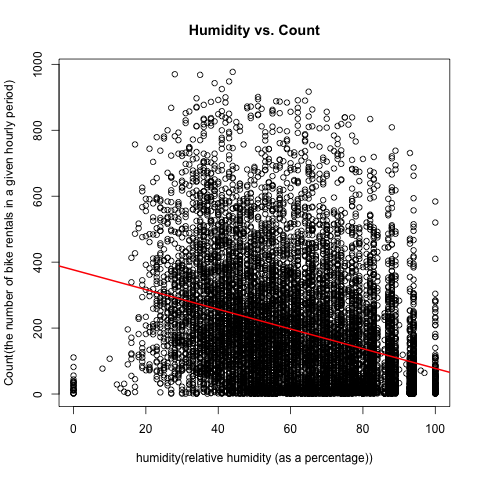

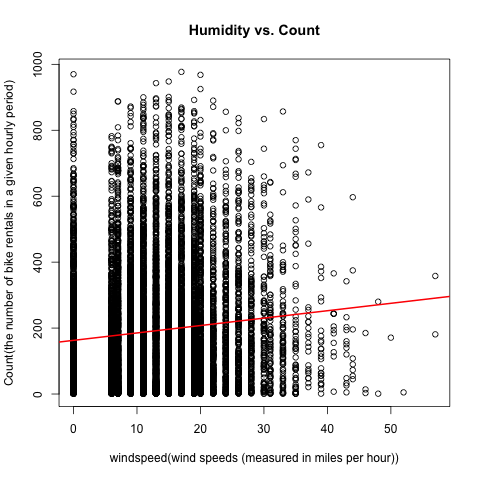

In [53]:
%%R
model <- lm(count ~ temp)
s <- summary(model)
plot(temp, count, ylab="Count(the number of bike rentals in a given hourly period)", 
     xlab="Temp(outdoor temperature (measured in Fahrenheit))", main = "Temp vs. Count")
abline(model, col = "red", lwd = 2)

model <- lm(count ~ humidity)
s <- summary(model)
plot(humidity, count, ylab="Count(the number of bike rentals in a given hourly period)", 
     xlab="humidity(relative humidity (as a percentage))", main = "Humidity vs. Count")
abline(model, col = "red", lwd = 2)

model <- lm(count ~ windspeed)
s <- summary(model)
plot(windspeed, count, ylab="Count(the number of bike rentals in a given hourly period)", 
     xlab="windspeed(wind speeds (measured in miles per hour))", main = "Humidity vs. Count")
abline(model, col = "red", lwd = 2)

Part D

Ranking: 
    windspeed, humidity and tempertaure. 

Part E 

the outside temperature is 70 degrees Fahrenheit :
y = 5.095x-156.99
plug x = 70 into the equation, and we have y = 199.66
Therefore, the expected number of bike rentals in hours is around 199. 

the wind speed is 10 miles per hour
y = 2.25x+162.79
plug x = 10 into the equation, and we have y = 185.29
Therefore, the expected number of bike rentals in hours is around 185.

the relative humidity is 40%
y = -2.99x+376.45
plug x = 40 into the equation, and we have y = 256.85
Therefore, the expected number of bike rentals in hours is around 256

Part F

What risk does one face when predicting outside the range of observed explanatory variable values?
The risk is the prediction will become meaning less. Let's think about the confidence interval graph. The shape means that when we do the predicting of the mean of the explanatory variable it ia powerful. Therefore, when we do predicting outside the range of observed explanatory variable values it is pointless.  

Part G 

[Text(0,0.5,'count(the number of bike rentals in a given hourly period)'),
 Text(0.5,0,'season(1 = spring, 2 = summer, 3 = fall, 4 = winter)')]

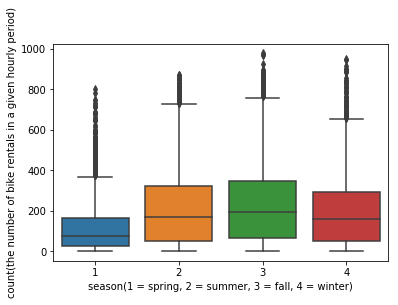

In [65]:
ax = sns.boxplot(season, count)
ax.set(xlabel='season(1 = spring, 2 = summer, 3 = fall, 4 = winter)', 
       ylabel = 'count(the number of bike rentals in a given hourly period)',)

    base on this boxplot, we can see there is a relationship between bike rentals and season. People tend to rent more bikes during fall, and rent the least bikes in spring.
    range seasons by how many bikes people rent: fall, summer, winter and spring.

[Text(0,0.5,'count(the number of bike rentals in a given hourly period)'),
 Text(0.5,0,'weather(1 = nice, 2 = cloudy, 3 = rainy, 4 = stormy)')]

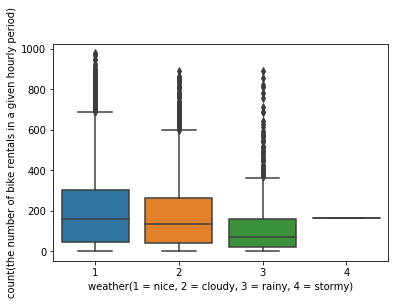

In [76]:
ax = sns.boxplot(weather, count)
ax.set(xlabel='weather(1 = nice, 2 = cloudy, 3 = rainy, 4 = stormy)', 
       ylabel = 'count(the number of bike rentals in a given hourly period)',)

     base on this boxplot, we can see there is a strong relationship between bike rentals and weather. The better weather, the bigger amount of bike rentals.
    range weather by the count: nice, cloudy, rainy and stormy.

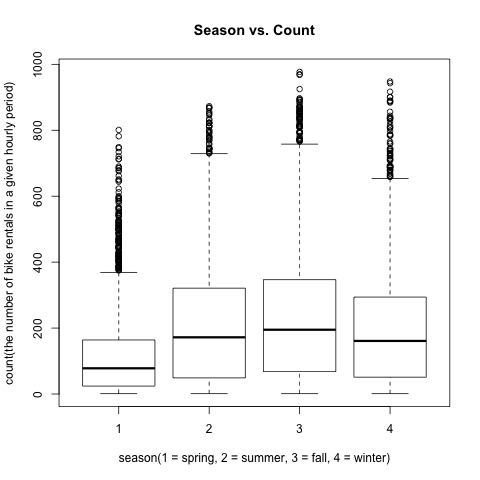

In [77]:
%%R
boxplot(count~season, main = "Season vs. Count", 
       xlab ="season(1 = spring, 2 = summer, 3 = fall, 4 = winter)",
       ylab = "count(the number of bike rentals in a given hourly period)")

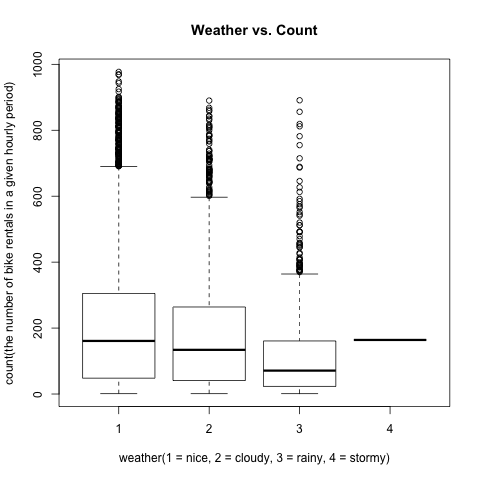

In [78]:
%%R
boxplot(count~weather, main = "Weather vs. Count", 
       xlab ="weather(1 = nice, 2 = cloudy, 3 = rainy, 4 = stormy)",
       ylab = "count(the number of bike rentals in a given hourly period)")

Part H

In [79]:
lm = smf.OLS(count, sm.tools.tools.add_constant(season),)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     298.7
Date:                Wed, 12 Sep 2018   Prob (F-statistic):           4.76e-66
Time:                        09:51:37   Log-Likelihood:                -71898.
No. Observations:               10886   AIC:                         1.438e+05
Df Residuals:                   10884   BIC:                         1.438e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.0872      4.211     29.705      0.000     116.833     133.342
season        26.5246      1.535     17.283      0.000      23.516      29.533
==============================================================================
Omnibus:                     2041.415   Durbin-Watson:                   0.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3536.912
Skew:                           1.222   Prob(JB):                         0.00
Kurtosis:                       4.349   Cond. No.                         7.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
%%R
model <- lm(count~season)
s <- summary(model)
s


Call:
lm(formula = count ~ season)

Residuals:
    Min      1Q  Median      3Q     Max 
-230.19 -138.61  -44.90   88.86  772.34 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  125.087      4.211   29.70   <2e-16 ***
season        26.525      1.535   17.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 178.7 on 10884 degrees of freedom
Multiple R-squared:  0.02671,	Adjusted R-squared:  0.02662 
F-statistic: 298.7 on 1 and 10884 DF,  p-value: < 2.2e-16



The linear regeression relationship between count and season is not useful. Since when season is 0 and count will be some number around 125 which is valiad. However, season 0 is meaningless. Therefore, use this linear regression relation to predict will be risky and pointless. 

In [81]:
lm = smf.OLS(count, sm.tools.tools.add_constant(weather),)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     183.2
Date:                Wed, 12 Sep 2018   Prob (F-statistic):           2.11e-41
Time:                        09:51:37   Log-Likelihood:                -71955.
No. Observations:               10886   AIC:                         1.439e+05
Df Residuals:                   10884   BIC:                         1.439e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.7273      4.221     57.748      0.000     235.454     252.000
weather      -36.7683      2.717    -13.535      0.000     -42.093     -31.443
==============================================================================
Omnibus:                     2024.230   Durbin-Watson:                   0.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3476.744
Skew:                           1.220   Prob(JB):                         0.00
Kurtosis:                       4.309   Cond. No.                         5.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
%%R
model <- lm(count~weather)
s <- summary(model)
s


Call:
lm(formula = count ~ weather)

Residuals:
    Min      1Q  Median      3Q     Max 
-205.96 -139.96  -44.96   91.04  770.04 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  243.727      4.221   57.75   <2e-16 ***
weather      -36.768      2.717  -13.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 179.6 on 10884 degrees of freedom
Multiple R-squared:  0.01655,	Adjusted R-squared:  0.01646 
F-statistic: 183.2 on 1 and 10884 DF,  p-value: < 2.2e-16



The linear regression relationship between weather and count is not practically useful. Let's think about when weather is equal to 0, the number of count will be 243, however, in real life there is no weather 0. Therefore, use it to predict or summary the relationship between these two variable is not meanful.

Part I

 Explain why the linear regressions in part (h) are inappropriate.
 Since the explanatory varaible value is not meaningful. For example, we can use 1 to represent spring, but we can also we 10000 to represent spring. The value here is just a symbol. There is no direct relationship between the result changing and explanatory changing. If we set 100 to be weather nice and 50 to be weather stormy and 1 to be weather cloudy. Does it mean when the explanatory varibale value increase the target variable value will increse or decrease?
 Therefore, these kind of variables are not suitable for finding linear regression relationship.
 Suggest an alternative approach that would be more appropriate.
 instead of finding the significant relationship between these kind of variables we can try to find the influence of these explanatory variables by compare the target value. If the decrese or increase of target variable values are big in center explanatory variable value, we can say that these explanatory variable do have big influence for the target variable, otherwise we can ignore the variable and focuse on others. 